In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [2]:
train_data = pd.read_csv("hw1_18_train.dat",
                         names = ["x{0}".format(i) for i in range(1,5)]+["y"],
                         delim_whitespace=True)
train_data.insert(0,"x0",1)
x = np.array(train_data.iloc[:,:-1])
y = np.array(train_data["y"])

In [3]:
def sign(n):
    return (n>0) and 1 or -1

def array_sign(na):
    cs = na >0
    return np.fromiter((1 if c else -1 for c in cs), dtype = int)

In [4]:
def verify(w, dx ,dy):
    n = len(dy)
    error = 0
    products = np.sum(w*dx, axis = 1)
    error = np.sum(array_sign(products) != dy)
    error = float(error)
    return error / n


def pocket(w0, update_number, seed = 0, learning_rate = 1.0):
    np.random.seed(seed)
    w=w0
    n = len(y)
    learning_rate_vector = np.zeros_like(w0)+learning_rate
    learning_rate_vector[0] = 1.0
    iter_number = 0
    ws = [w0]
    error_rate_best = verify(w0,x,y)
    while iter_number<update_number:
        i = np.random.randint(0,n)
        product = np.dot(x[i],ws[-1])
        if not sign(product) == y[i]:
            ws.append(ws[-1] + x[i]*learning_rate_vector*y[i])
            error_rate_new = verify(ws[-1], x, y)
            iter_number+=1
            if error_rate_new < error_rate_best:
                w = ws[-1]
                error_rate_best = error_rate_new
    return np.array(w)

def PLA(w0, update_number, seed = 0, learning_rate = 1.0):
    iter_number = 0
    w=w0
    n = len(y)
    learning_rate_vector = np.zeros_like(w0)+learning_rate
    learning_rate_vector[0] = 1.0
    j=-1
    index_order = range(n)
    random.seed(seed)
    random.shuffle(index_order)
    while iter_number < update_number:
        while True:
            j+=1
            if not j <n:
                j=0
            i = index_order[j]
            product = sum(x[i]*w)
            if not sign(product) == sign(y[i]):
                w = w + x[i]*learning_rate_vector*y[i]
                iter_number +=1
                break
    return np.array(w)

In [5]:
test_data = pd.read_csv("hw1_18_test.dat",
                        names = ["x{0}".format(i) for i in range(1,5)]+["y"],
                        delim_whitespace=True)
test_data.insert(0,"x0",1)
tx = np.array(test_data.iloc[:,:-1])
ty = np.array(test_data["y"])

## Problem 18

In [6]:
error_rates_p18 = []
w0 = np.zeros((5,))
for seed in range(2000):
    w=pocket(w0, 50, seed=seed)
    error_rates_p18.append(verify(w,tx,ty))

Average Error Rate: 0.132775


(array([ 645.,  486.,  413.,  277.,  115.,   41.,   17.,    5.,    0.,    1.]),
 array([ 0.1   ,  0.1172,  0.1344,  0.1516,  0.1688,  0.186 ,  0.2032,
         0.2204,  0.2376,  0.2548,  0.272 ]),
 <a list of 10 Patch objects>)

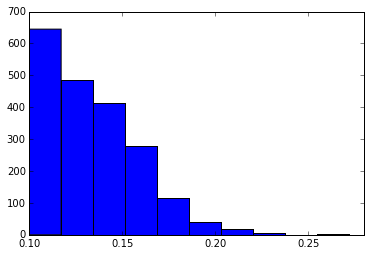

In [7]:
print "Average Error Rate:", np.average(error_rates_p18)
plt.hist(error_rates_p18)

## Problem 19

In [8]:
error_rates_p19 = []
w0 = np.zeros((5,))
for seed in range(2000):
    w=PLA(w0, 50, seed=seed)
    error_rates_p19.append(verify(w,tx,ty))

Average Error Rate: 0.362589


(array([ 151.,  348.,  491.,  218.,   93.,  106.,  126.,  106.,  132.,  229.]),
 array([ 0.108 ,  0.1674,  0.2268,  0.2862,  0.3456,  0.405 ,  0.4644,
         0.5238,  0.5832,  0.6426,  0.702 ]),
 <a list of 10 Patch objects>)

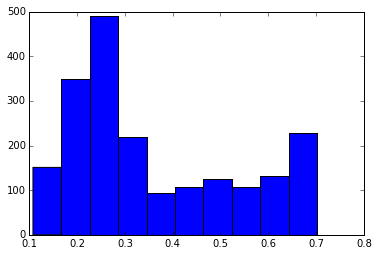

In [9]:
print "Average Error Rate:", np.average(error_rates_p19)
plt.hist(error_rates_p19)

## Problem 20

In [10]:
error_rates_p20 = []
w0 = np.zeros((5,))
for seed in range(2000):
    w=pocket(w0, 100, seed=seed)
    error_rates_p20.append(verify(w,tx,ty))

Average Error Rate: 0.115694


(array([  1.10000000e+03,   4.46000000e+02,   2.48000000e+02,
          1.28000000e+02,   4.20000000e+01,   2.20000000e+01,
          9.00000000e+00,   4.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([ 0.1   ,  0.1122,  0.1244,  0.1366,  0.1488,  0.161 ,  0.1732,
         0.1854,  0.1976,  0.2098,  0.222 ]),
 <a list of 10 Patch objects>)

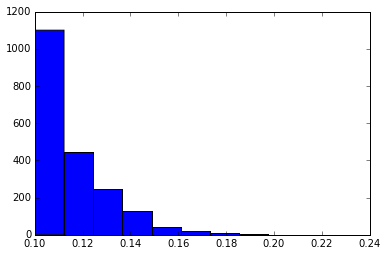

In [11]:
print "Average Error Rate:", np.average(error_rates_p20)
plt.hist(error_rates_p20)